# **ANALISIS PERBANDINGAN PERFORMA ARIMA DAN SARIMAX**

In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 35.0 MB/s eta 0:00:00


Memuat data

In [ ]:
print("\n--- Informasi Dasar Data ---")
df = pd.read_excel('base data.xlsx', header=2)
print("--- 5 Baris Terakhir Data ---")
print(df.tail())

df.info()
df.columns = ['ds', 'y', 'Inflasi', 'Jum_Penduduk']
df = df.set_index('ds')


--- Informasi Dasar Data ---
--- 5 Baris Terakhir Data ---
   2003-04-01 00:00:00    1932  0.0698  223568251
81          2023-10-01  4193.0  0.0261  281190067
82          2024-01-01  4245.5  0.0305  281764533
83          2024-04-01  4298.0  0.0251  282338999
84          2024-07-01  4350.5  0.0184  282913465
85          2024-10-01  4403.0  0.0157  283487931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   2003-04-01 00:00:00  86 non-null     datetime64[ns]
 1   1932                 86 non-null     float64       
 2   0.0698               86 non-null     float64       
 3   223568251            86 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.8 KB


Memastikan tidak ada missing value

In [ ]:
print("\n--- 3.2. Cek Nilai yang Hilang (Missing Values) ---")
print(df.isnull().sum())

# Konfigurasi plot
plt.style.use('ggplot')
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6)

# PEMUATAN DAN PRA-PEMROSESAN DATA
print(" Memuat dan Memproses Data ")

file_name = 'base data.xlsx'
try:
    df = pd.read_excel(file_name, sheet_name='Sheet1')
    df['ds'] = pd.to_datetime(df['ds'])
    df = df.set_index('ds')

    df.columns = ['y', 'Inflasi', 'Jum_Penduduk']
    df = df.dropna()
    print(f"Data berhasil dimuat. Rentang waktu: {df.index.min().date()} s/d {df.index.max().date()}")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat data: {e}")


--- 3.2. Cek Nilai yang Hilang (Missing Values) ---
y               0
Inflasi         0
Jum_Penduduk    0
dtype: int64
 Memuat dan Memproses Data 
Data berhasil dimuat. Rentang waktu: 2003-01-01 s/d 2024-10-01


**Visualisasi data awal**

Pada plot komparasi terdapat perbedaan milai yang terlalu besar antara PDB dengan jumlah penduduk, maka digunakan sumbu Y sekunder agar plot dapat dikomparasi.


                               Visualisasi Deret Waktu Tiap Variabel             


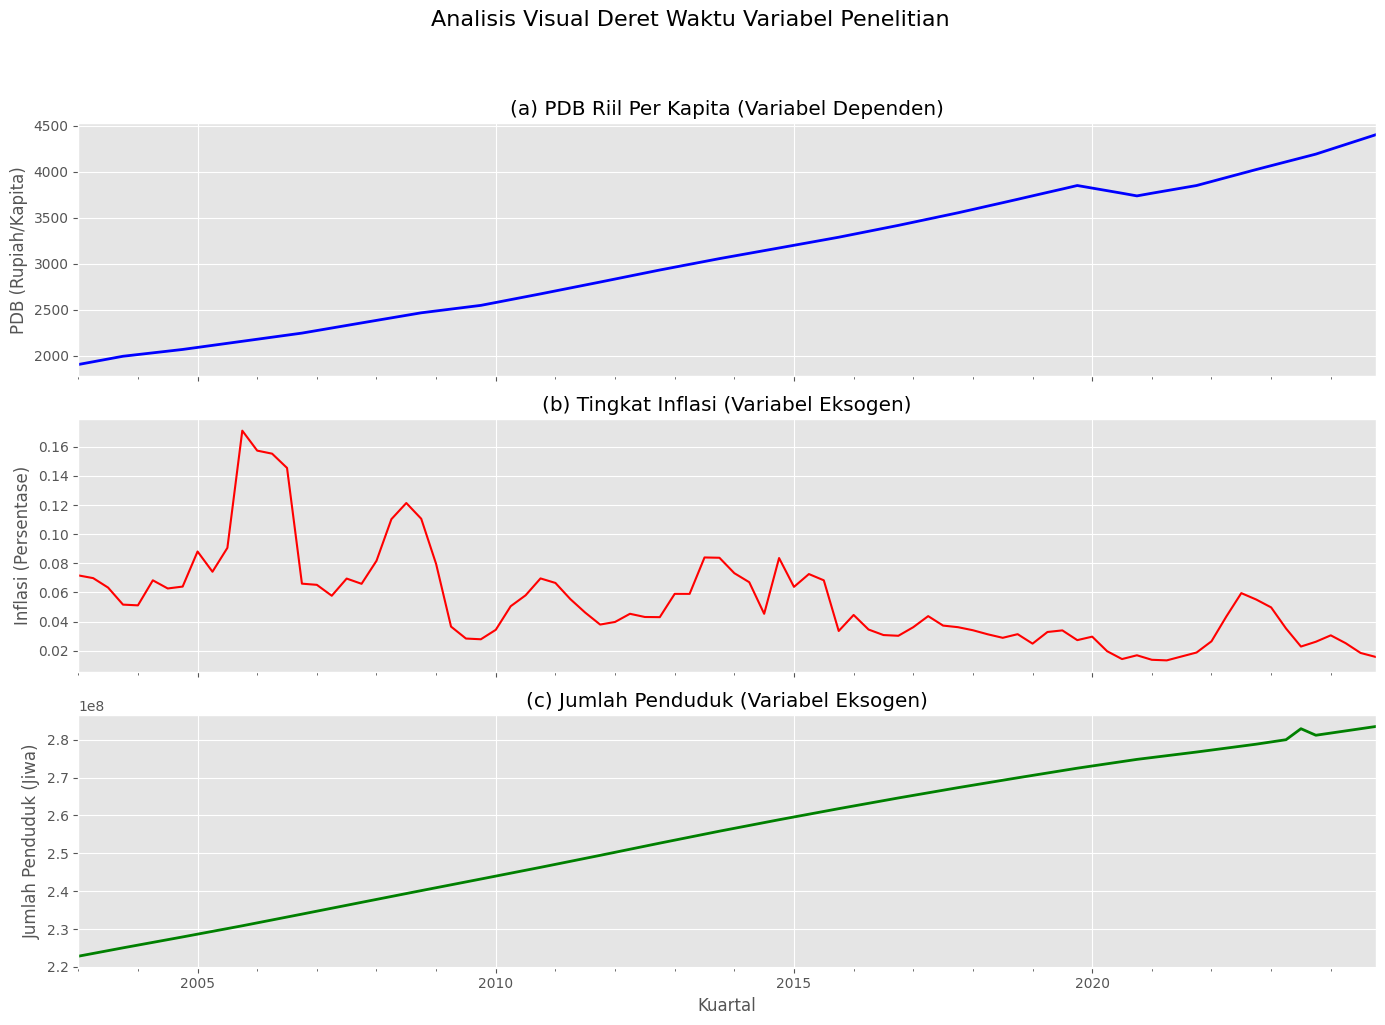


Visualisasi telah selesai. Amati tren: PDB dan Jumlah Penduduk menunjukkan tren naik, sedangkan Inflasi lebih fluktuatif.

--- 2. Plot Komparasi (Menggunakan Sumbu Y Sekunder) ---


/tmp/ipython-input-2207386501.py:63: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax1.legend(lines + lines2 + labels + labels2 + labels3, labels + labels2 + labels3, loc='upper left', frameon=True)


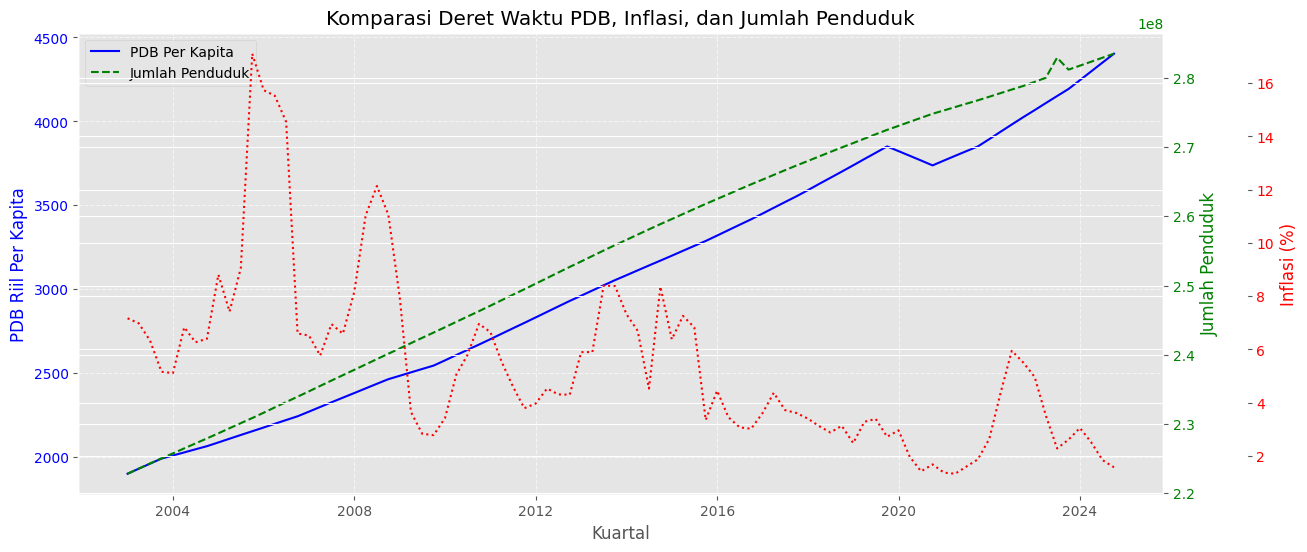

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


print("\n                               Visualisasi Deret Waktu Tiap Variabel             ")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True)
plt.suptitle('Analisis Visual Deret Waktu Variabel Penelitian', fontsize=16, y=1.02)

# Plot 1: PDB Riil Per Kapita
df['y'].plot(ax=axes[0], title='(a) PDB Riil Per Kapita (Variabel Dependen)', color='blue', linewidth=2)
axes[0].set_ylabel('PDB (Rupiah/Kapita)')
axes[0].grid(True)

# Plot 2: Inflasi (Variabel Eksogen 1)
df['Inflasi'].plot(ax=axes[1], title='(b) Tingkat Inflasi (Variabel Eksogen)', color='red', linestyle='-', linewidth=1.5)
axes[1].set_ylabel('Inflasi (Persentase)')
axes[1].grid(True)

# Plot 3: Jumlah Penduduk (Variabel Eksogen 2)
df['Jum_Penduduk'].plot(ax=axes[2], title='(c) Jumlah Penduduk (Variabel Eksogen)', color='green', linewidth=2)
axes[2].set_ylabel('Jumlah Penduduk (Jiwa)')
axes[2].set_xlabel('Kuartal')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Menyesuaikan layout agar judul tidak terpotong
plt.show()

print("\nVisualisasi telah selesai. Amati tren: PDB dan Jumlah Penduduk menunjukkan tren naik, sedangkan Inflasi lebih fluktuatif.")

print("\n--- 2. Plot Komparasi (Menggunakan Sumbu Y Sekunder) ---")
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx() # Membuat sumbu Y sekunder
ax3 = ax1.twinx() # Membuat sumbu Y tersier

# --- Plot PDB (Sumbu Y Primer / Kiri) ---
color_pdb = 'blue'
ax1.plot(df.index, df['y'], color=color_pdb, label='PDB Per Kapita', linestyle='-') # Corrected column name
ax1.set_xlabel('Kuartal')
ax1.set_ylabel('PDB Riil Per Kapita', color=color_pdb)
ax1.tick_params(axis='y', labelcolor=color_pdb)
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Inflasi (Sumbu Y Sekunder / Kanan Atas)
# Mengatur sumbu Y ke-3 agar tidak bertumpuk dengan ax2.
# Perlu offset agar ax3 tidak tumpang tindih dengan ax2
ax3.spines['right'].set_position(('outward', 60))

color_inf = 'red'
ax3.plot(df.index, df['Inflasi'] * 100, color=color_inf, label='Inflasi (%)', linestyle=':') # Inflasi dalam persentase
ax3.set_ylabel('Inflasi (%)', color=color_inf)
ax3.tick_params(axis='y', labelcolor=color_inf)

# Plot Jumlah Penduduk (Sumbu Y Sekunder / Kanan Bawah)
color_pop = 'green'
ax2.plot(df.index, df['Jum_Penduduk'], color=color_pop, label='Jumlah Penduduk', linestyle='--') # Corrected column name
ax2.set_ylabel('Jumlah Penduduk', color=color_pop)
ax2.tick_params(axis='y', labelcolor=color_pop)

# Menyatukan legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + labels + labels2 + labels3, labels + labels2 + labels3, loc='upper left', frameon=True)
plt.title('Komparasi Deret Waktu PDB, Inflasi, dan Jumlah Penduduk')
plt.show()

Transformasi Logaritma

Data berhasil dimuat. Rentang waktu: 2003-01-01 s/d 2024-10-01
--- 3 Nilai (Original vs Log Transformed) ---
                Py   Log_PDB
ds                          
2003-01-01  1902.0  7.550661
2003-04-01  1932.0  7.566311
2003-07-01  1962.0  7.581720
                Py   Log_PDB
ds                          
2024-04-01  4298.0  8.365905
2024-07-01  4350.5  8.378046
2024-10-01  4403.0  8.390041


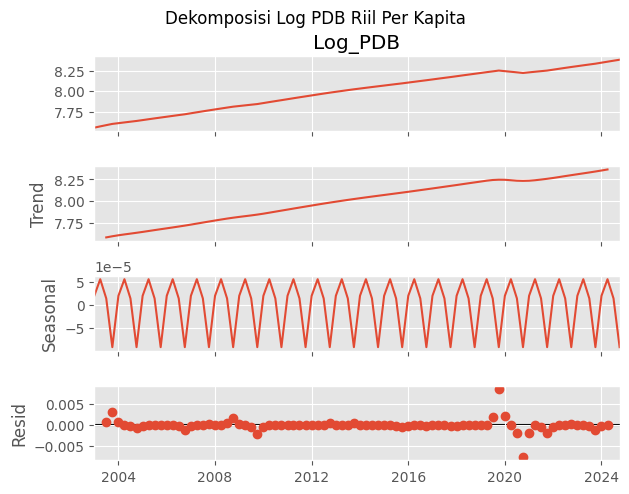

In [ ]:
# 1. PEMUATAN DAN PRA-PEMROSESAN DATA
file_name = 'base data.xlsx'
try:
    # Change from read_csv to read_excel and specify sheet_name
    df = pd.read_excel(file_name, sheet_name='Sheet1')
    df['ds'] = pd.to_datetime(df['ds'])
    df = df.set_index('ds')
    df.columns = ['Py', 'Inflasi', 'Jum_Penduduk'] # Corrected to 'Py' for consistency
    df = df.dropna()
    print(f"Data berhasil dimuat. Rentang waktu: {df.index.min().date()} s/d {df.index.max().date()}")
except Exception as e:
    print(f"Gagal memuat atau memproses data: {e}")
    exit()

# 2. TRANSFORMASI LOGARITMA (Untuk menstabilkan varians)
df['Log_PDB'] = np.log(df['Py']) # Corrected to 'Py'
y_full_log = df['Log_PDB']

  # MENAMPILKAN NILAI sebelum dan setelah Log
print("--- 3 Nilai (Original vs Log Transformed) ---")
print(df[['Py', 'Log_PDB']].head(3)) # Corrected 'y' to 'Py'
print(df[['Py', 'Log_PDB']].tail(3)) # Corrected 'y' to 'Py'

# 3. DEKOMPOSISI DERET WAKTU (Visualisasi Tren dan Musiman)
decomposition = sm.tsa.seasonal_decompose(y_full_log, model='additive', period=4)
decomposition.plot()
plt.suptitle('Dekomposisi Log PDB Riil Per Kapita', y=1.02)
plt.show()


PENENTUAN ORDE INTEGRASI (d dan D) MENGGUNAKAN AUTO ARIMA UNIVARIATE

In [ ]:
print("\n--- 3. Penentuan Orde Integrasi (d, D) menggunakan Auto ARIMA Univariate ---")
temp_model = auto_arima(
    y_full_log,
    m=4, # Kuartalan
    seasonal=True,
    start_p=0, start_q=0, max_p=3, max_q=3, # Batasan orde AR/MA
    d=None, D=None, # Biarkan Auto ARIMA mencari d dan D
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

d_param = temp_model.order[1]
D_param = temp_model.seasonal_order[1]

print(f"\nParameter Integrasi yang Ditemukan:")
print(f"Orde Diferensiasi Non-Musiman (d): {d_param}")
print(f"Orde Diferensiasi Musiman (D): {D_param}")



--- 3. Penentuan Orde Integrasi (d, D) menggunakan Auto ARIMA Univariate ---
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=-704.498, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-707.253, Time=0.31 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-738.991, Time=2.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-757.806, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-544.455, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=-761.200, Time=0.39 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=-756.823, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=-737.954, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=-783.577, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=-712.899, Time=0.46 sec
 ARIMA(1,1,1)(0,0,1)[4] intercept   : AIC=-795.394, Time=0.54 sec
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-742.999, Time=0.39 sec
 ARIMA(1,1,1)(0,0,2)[4] intercept   : AIC=-791.390, Time=0.41 sec
 ARIMA(1,1,1)(1,0,2)[

Plot ACF PACF

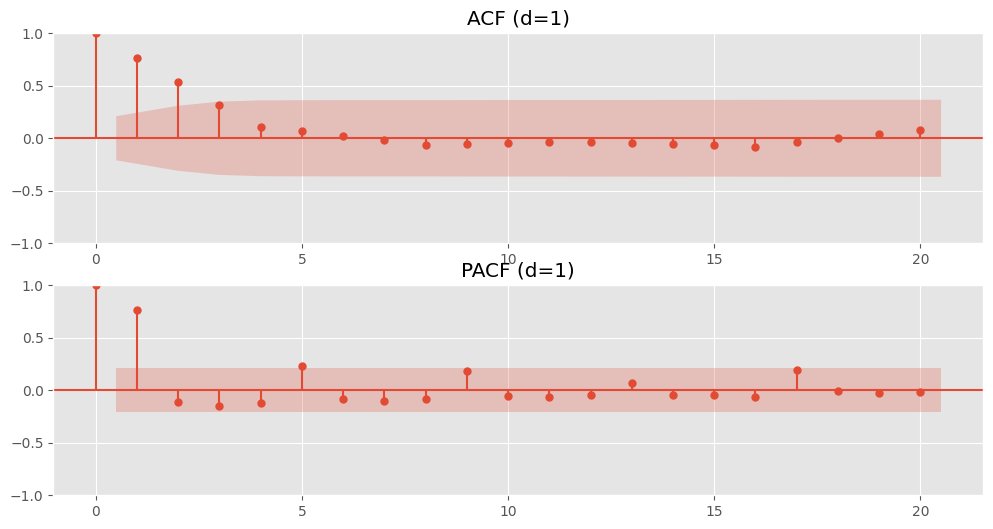

In [ ]:
if d_param > 0 and D_param > 0:
    data_diff = y_full_log.diff(d_param).diff(D_param * 4).dropna()
    title_suffix = f'(d={d_param}, D={D_param})'
elif d_param > 0:
    data_diff = y_full_log.diff(d_param).dropna()
    title_suffix = f'(d={d_param})'
elif D_param > 0:
    data_diff = y_full_log.diff(D_param * 4).dropna()
    title_suffix = f'(D={D_param})'
else:
    data_diff = y_full_log
    title_suffix = '(Original Data)'

fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(data_diff, lags=20, ax=axes[0], title=f'ACF {title_suffix}')
plot_pacf(data_diff, lags=20, ax=axes[1], title=f'PACF {title_suffix}')
plt.show()

  Pembagian data training dan testing

In [ ]:
cutoff_date = pd.to_datetime('2022-12-31')
df_train = df[df.index <= cutoff_date]
df_test = df[df.index > cutoff_date]

# Variabel yang digunakan untuk pemodelan: Log_PDB
y_train_log = df_train['Log_PDB']
exog_train = df_train[['Inflasi', 'Jum_Penduduk']] # Corrected to 'Jum_Penduduk'

Proyeksi variabel eksogen

In [ ]:
future_horizon = 12 # Q1 2024 - Q4 2026 (12 kuartal)
future_dates = pd.date_range(start='2024-01-01', periods=future_horizon, freq='QS-JAN')
df_future = pd.DataFrame(index=future_dates)
df_future.index.name = 'ds'

print("1. Proyeksi Jumlah Penduduk...")
model_pop = auto_arima(df['Jum_Penduduk'], seasonal=True, m=4, suppress_warnings=True, stepwise=True) # Corrected column name
pop_forecast = model_pop.predict(n_periods=future_horizon)
df_future['Jum_Penduduk'] = pop_forecast.values # Corrected column name

print("2. Proyeksi Inflasi (Asumsi konstan 3.0%)...")
df_future['Inflasi'] = 0.03

exog_future = df_future[['Inflasi', 'Jum_Penduduk']] # Corrected column name
print("\nProyeksi Variabel Eksogen Masa Depan:")
print(exog_future)

1. Proyeksi Jumlah Penduduk...
2. Proyeksi Inflasi (Asumsi konstan 3.0%)...

Proyeksi Variabel Eksogen Masa Depan:
            Inflasi  Jum_Penduduk
ds                               
2024-01-01     0.03   284062397.0
2024-04-01     0.03   284636863.0
2024-07-01     0.03   285211329.0
...             ...           ...
2026-04-01     0.03   289232591.0
2026-07-01     0.03   289807057.0
2026-10-01     0.03   290381523.0

[12 rows x 2 columns]


Pemodelan dan kalibrasi model

In [ ]:
# 1. Kalibrasi SARIMAX (Orde otomatis oleh Auto ARIMA)
print("1. Kalibrasi SARIMAX (Menggunakan Log PDB dan Variabel Eksogen)...")
best_model_sarimax = auto_arima(
    y_train_log, # Target: Log PDB
    exog=exog_train, # Eksogen: Inflasi & Jum_Penduduk AKTUAL
    m=4, start_P=0, seasonal=True, d=None, D=None, trace=False, error_action='ignore', suppress_warnings=True, stepwise=True
)
sarimax_order = best_model_sarimax.order
sarimax_seasonal_order = best_model_sarimax.seasonal_order
print(f"SARIMAX Orde Terbaik: {sarimax_order} x {sarimax_seasonal_order} (AIC: {best_model_sarimax.aic():.2f})")

# 2. Kalibrasi Prophet
print("\n2. Kalibrasi Prophet (Menggunakan Log PDB dan Variabel Eksogen)...")
df_prophet_train = df_train.reset_index().rename(columns={'Log_PDB': 'y'})

m_prophet = Prophet(growth='linear', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
m_prophet.add_regressor('Inflasi')
m_prophet.add_regressor('Jum_Penduduk') # Corrected regressor name from 'Jumlah_Penduduk' to 'Jum_Penduduk'
m_prophet.fit(df_prophet_train)
print("Model Prophet terkalibrasi.")

1. Kalibrasi SARIMAX (Menggunakan Log PDB dan Variabel Eksogen)...
SARIMAX Orde Terbaik: (0, 2, 0) x (0, 0, 1, 4) (AIC: -728.14)

2. Kalibrasi Prophet (Menggunakan Log PDB dan Variabel Eksogen)...
Model Prophet terkalibrasi.


Evaluasi kinerja dan prediksi terhadap data aktual



======================== TAHAP IV: EVALUASI KINERJA ========================

--- Tabel Hasil Evaluasi Kinerja (Data Testing 2023) ---
               RMSE         MAE  MAPE (%)
Model                                    
SARIMAX  112.884391   97.106567  2.263316
Prophet  271.214680  251.349720  5.907837

Model Terbaik untuk Prediksi Final: SARIMAX


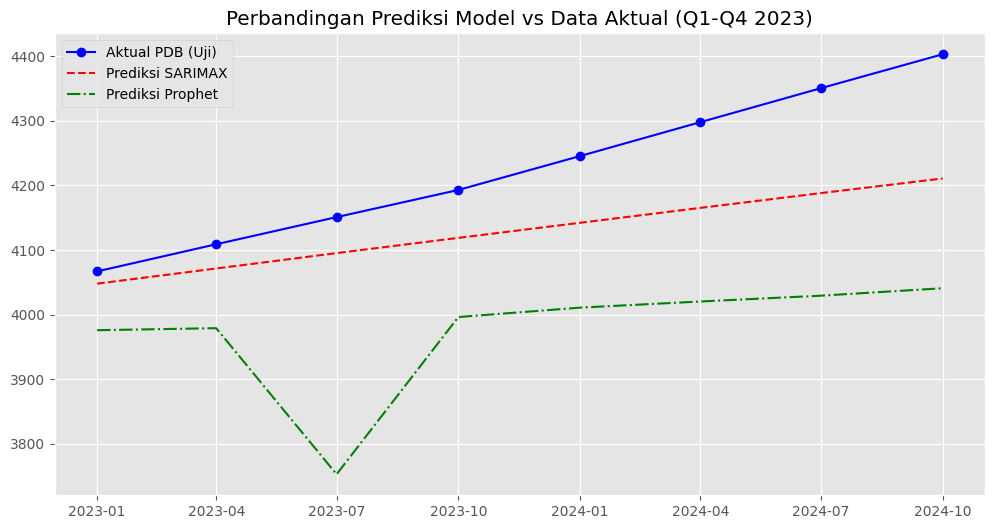

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Metrik Evaluasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\n\n======================== TAHAP IV: EVALUASI KINERJA ========================")

# Pastikan y_test_log dan exog_test didefinisikan (diambil dari TAHAP I)
y_test_log = df_test['Log_PDB']
exog_test = df_test[['Inflasi', 'Jum_Penduduk']]

# 1. Prediksi & Evaluasi SARIMAX
sarimax_forecast_log = best_model_sarimax.predict(n_periods=len(df_test), exog=exog_test)
# Transformasi balik: np.exp()
sarimax_forecast_series = np.exp(pd.Series(sarimax_forecast_log, index=df_test.index))
actual_pdb = df_test['Py'] # Corrected column name from 'PDB_Per_Kapita' to 'Py'

sarimax_rmse = np.sqrt(mean_squared_error(actual_pdb, sarimax_forecast_series))
sarimax_mape = mean_absolute_percentage_error(actual_pdb, sarimax_forecast_series) * 100
sarimax_mae = mean_absolute_error(actual_pdb, sarimax_forecast_series) # <-- MAE DIHITUNG

# 2. Prediksi & Evaluasi Prophet
future_test_prophet = df_test.reset_index().rename(columns={'ds': 'ds'})[['ds']]
future_test_prophet['Inflasi'] = exog_test['Inflasi'].values
future_test_prophet['Jum_Penduduk'] = exog_test['Jum_Penduduk'].values # Corrected column name from 'Jumlah_Penduduk' to 'Jum_Penduduk'

prophet_forecast = m_prophet.predict(future_test_prophet)
# Transformasi balik: np.exp()
prophet_forecast_series = np.exp(pd.Series(prophet_forecast['yhat'].values, index=df_test.index))

prophet_rmse = np.sqrt(mean_squared_error(actual_pdb, prophet_forecast_series))
prophet_mape = mean_absolute_percentage_error(actual_pdb, prophet_forecast_series) * 100
prophet_mae = mean_absolute_error(actual_pdb, prophet_forecast_series) # <-- MAE DIHITUNG

# 3. Komparasi dan Seleksi Model
comparison_results = pd.DataFrame({
    'Model': ['SARIMAX', 'Prophet'],
    'RMSE': [sarimax_rmse, prophet_rmse],
    'MAE': [sarimax_mae, prophet_mae],
    'MAPE (%)': [sarimax_mape, prophet_mape]
}).set_index('Model').sort_values(by='MAPE (%)')

print("\n--- Tabel Hasil Evaluasi Kinerja (Data Testing 2023) ---")
print(comparison_results)

best_model_name = comparison_results.index[0]
print(f"\nModel Terbaik untuk Prediksi Final: {best_model_name}")

# Visualisasi Hasil Prediksi Uji
plt.figure(figsize=(12, 6))
plt.plot(actual_pdb.index, actual_pdb, label='Aktual PDB (Uji)', marker='o', color='blue')
plt.plot(sarimax_forecast_series.index, sarimax_forecast_series, label='Prediksi SARIMAX', linestyle='--', color='red')
plt.plot(prophet_forecast_series.index, prophet_forecast_series, label='Prediksi Prophet', linestyle='-.', color='green')
plt.title('Perbandingan Prediksi Model vs Data Aktual (Q1-Q4 2023)')
plt.legend()
plt.show()

Forecast model terbaik - 2026 (sarimax)



======================== TAHAP V: PERAMALAN FINAL Q4 2026 ========================
Melatih ulang model SARIMAX dengan seluruh data historis...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



--- Nilai Prediksi PDB Per Kapita (Q1 2024 - Q4 2026) ---
            PDB_Forecast  Lower_Bound_95  Upper_Bound_95
ds                                                      
2024-01-01   4446.536134     4424.870907     4468.307439
2024-04-01   4491.140891     4442.357292     4540.460205
2024-07-01   4537.453797     4455.283392     4621.139701
...                  ...             ...             ...
2026-04-01   4872.294027     4532.444535     5237.625945
2026-07-01   4922.104313     4542.572824     5333.345618
2026-10-01   4972.423818     4551.938276     5431.751734

[12 rows x 3 columns]


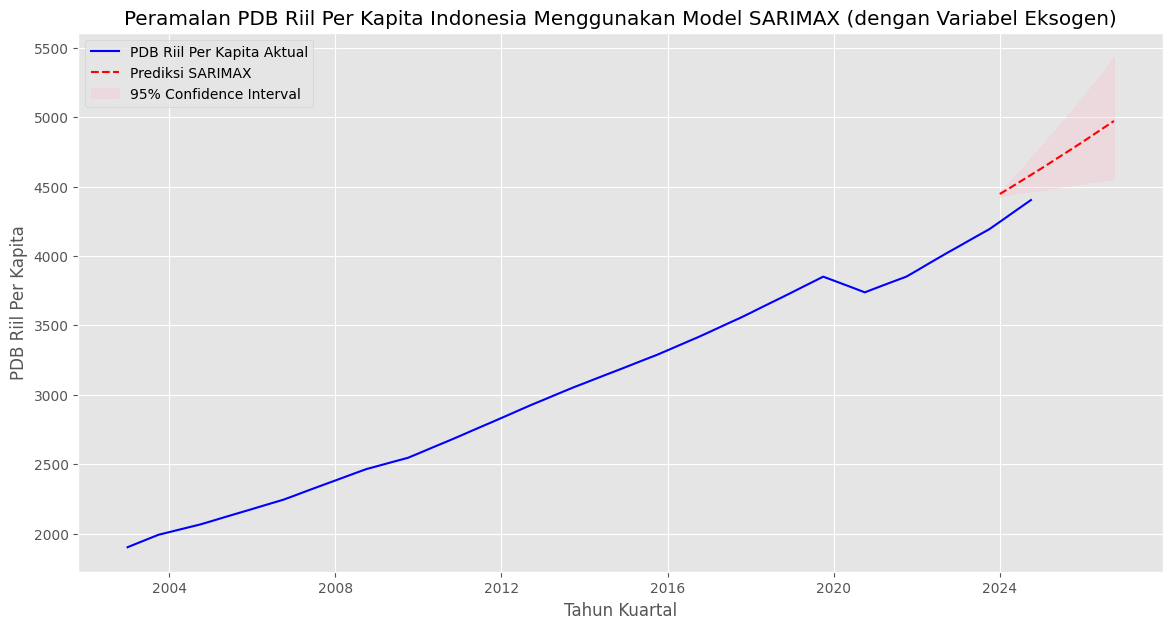

In [ ]:
print("\n\n======================== TAHAP V: PERAMALAN FINAL Q4 2026 ========================")

# 1. PELATIHAN ULANG MODEL TERBAIK MENGGUNAKAN SELURUH DATA LOG
print(f"Melatih ulang model {best_model_name} dengan seluruh data historis...")

if best_model_name == 'SARIMAX':
    final_model = SARIMAX(
        y_full_log, # Seluruh Log PDB
        exog=df[['Inflasi', 'Jum_Penduduk']], # Seluruh Eksogen - Corrected column name
        order=sarimax_order,
        seasonal_order=sarimax_seasonal_order,
        enforce_stationarity=False, enforce_invertibility=False
    ).fit(disp=False)

    # Peramalan (Hasil dalam Log)
    forecast_final_log = final_model.get_forecast(steps=future_horizon, exog=exog_future)
    pred_mean_log = forecast_final_log.predicted_mean
    conf_int_log = forecast_final_log.conf_int(alpha=0.05)

    # Transformasi balik: Eksponensial
    pred_mean_final = np.exp(pred_mean_log)
    lower_bound = np.exp(conf_int_log.iloc[:, 0])
    upper_bound = np.exp(conf_int_log.iloc[:, 1])

elif best_model_name == 'Prophet':
    # Latih ulang Prophet menggunakan seluruh data Log
    df_prophet_full = df.reset_index().rename(columns={'Log_PDB': 'y'})
    m_prophet_final = Prophet(growth='linear', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
    m_prophet_final.add_regressor('Inflasi')
    m_prophet_final.add_regressor('Jum_Penduduk') # Corrected column name
    m_prophet_final.fit(df_prophet_full)

    future_prophet_df = exog_future.reset_index().rename(columns={'ds': 'ds'})
    forecast_final_log = m_prophet_final.predict(future_prophet_df)

    # Transformasi balik: Eksponensial
    pred_mean_final = np.exp(forecast_final_log['yhat'])
    lower_bound = np.exp(forecast_final_log['yhat_lower'])
    upper_bound = np.exp(forecast_final_log['yhat_upper'])

# 2. FORMAT HASIL PERAMALAN FINAL
df_forecast_final = pd.DataFrame({
    'PDB_Forecast': pred_mean_final.values,
    'Lower_Bound_95': lower_bound.values,
    'Upper_Bound_95': upper_bound.values
}, index=future_dates)

print("\n--- Nilai Prediksi PDB Per Kapita (Q1 2024 - Q4 2026) ---")
print(df_forecast_final)
# 3. VISUALISASI PERAMALAN FINAL
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Py'], label='PDB Riil Per Kapita Aktual', color='blue') # Corrected column name
plt.plot(df_forecast_final.index, df_forecast_final['PDB_Forecast'], label=f'Prediksi {best_model_name}', color='red', linestyle='--')
plt.fill_between(
    df_forecast_final.index,
    df_forecast_final['Lower_Bound_95'],
    df_forecast_final['Upper_Bound_95'],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.title(f'Peramalan PDB Riil Per Kapita Indonesia Menggunakan Model {best_model_name} (dengan Variabel Eksogen)')
plt.xlabel('Tahun Kuartal')
plt.ylabel('PDB Riil Per Kapita')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Membaca Data (Sesuai format file Anda)
file_path = 'base data.xlsx' # Corrected file name
df = pd.read_excel(file_path, sheet_name='Sheet1') # Changed to read_excel and specified sheet_name
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
df.columns = ['y', 'Inflasi', 'Jum_Penduduk'] # Assigned column names after setting 'ds' as index

# 2. Pembagian Data (Latih & Uji)
# Kita gunakan tahun 2024 sebagai data uji (4 triwulan terakhir)
train = df.iloc[:-4]
test = df.iloc[-4:]

y_train = train['y']
y_test = test['y']

# Exogenous variables untuk SARIMAX
exog_train = train[['Inflasi', 'Jum_Penduduk']]
exog_test = test[['Inflasi', 'Jum_Penduduk']]

In [ ]:
print("Sedang mencari parameter optimal... Mohon tunggu.")

# --- A. MODEL ARIMA (Univariate - Tanpa Eksogen) ---
model_arima = auto_arima(y_train, seasonal=False, stepwise=True, suppress_warnings=True)
arima_fit = model_arima.fit(y_train)
forecast_arima = arima_fit.predict(n_periods=4)

# --- B. MODEL SARIMAX (Multivariate - Dengan Eksogen & Musiman) ---
# Kita asumsikan m=4 untuk data triwulan
model_sarimax = auto_arima(y_train, exogenous=exog_train, seasonal=True, m=4,
                           stepwise=True, suppress_warnings=True)
sarimax_fit = SARIMAX(y_train, exog=exog_train,
                      order=model_sarimax.order,
                      seasonal_order=model_sarimax.seasonal_order).fit(disp=False)
forecast_sarimax = sarimax_fit.forecast(steps=4, exog=exog_test)

Sedang mencari parameter optimal... Mohon tunggu.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
def calculate_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    return rmse, mae, mape

# Hitung untuk kedua metode
rmse_ari, mae_ari, mape_ari = calculate_metrics(y_test, forecast_arima)
rmse_sar, mae_sar, mape_sar = calculate_metrics(y_test, forecast_sarimax)

# Buat Tabel Perbandingan
metrics_df = pd.DataFrame({
    'Metode': ['ARIMA (Baseline)', 'SARIMAX (Eksogen)'],
    'RMSE': [rmse_ari, rmse_sar],
    'MAE': [mae_ari, mae_sar],
    'MAPE (%)': [mape_ari, mape_sar]
})

print("\nTABEL PERBANDINGAN AKURASI (DATA UJI 2024):")
print(metrics_df.to_string(index=False))


TABEL PERBANDINGAN AKURASI (DATA UJI 2024):
           Metode      RMSE       MAE  MAPE (%)
 ARIMA (Baseline) 46.073463 41.108338  0.944298
SARIMAX (Eksogen) 93.081953 80.395898  1.844820


In [ ]:
final_model = auto_arima(df['y'], seasonal=False, stepwise=True, suppress_warnings=True)
final_fit = final_model.fit(df['y'])

# Prediksi 8 triwulan ke depan (2025: 4 triwulan, 2026: 4 triwulan)
forecast_2026 = final_fit.predict(n_periods=8)

# Buat Index Tanggal untuk Masa Depan
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=8, freq='QS')
df_forecast = pd.DataFrame({'ds': future_dates, 'y_forecast': forecast_2026})
df_forecast.set_index('ds', inplace=True)

print("\n--- HASIL RAMALAN PDB PER KAPITA (2025 - 2026) ---")
display(df_forecast)

NameError: name 'df' is not defined

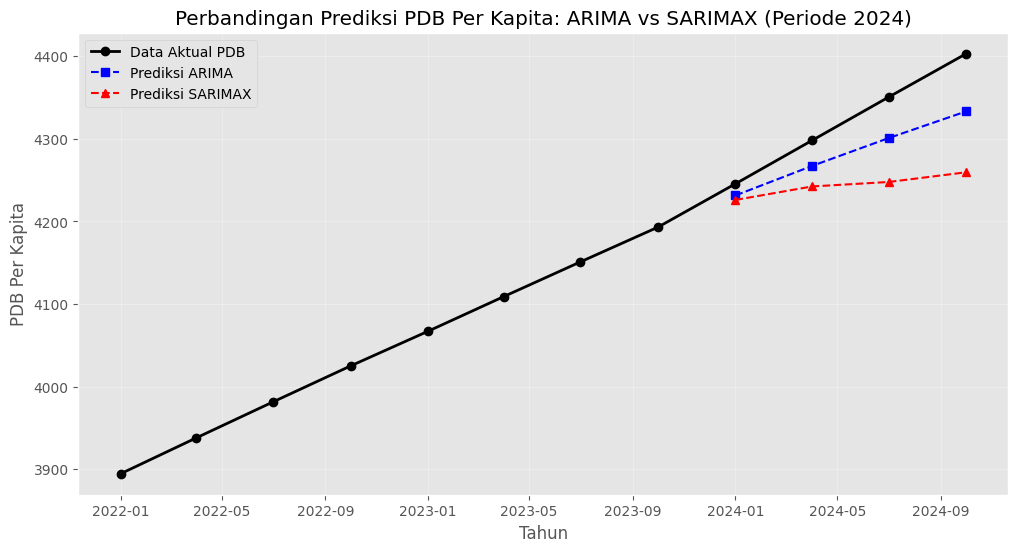

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Data Aktual (3 tahun terakhir agar lebih jelas)
plt.plot(df.index[-12:], df['y'][-12:], label='Data Aktual PDB', color='black', marker='o', linewidth=2)

# Plot Prediksi ARIMA
plt.plot(test.index, forecast_arima, label='Prediksi ARIMA', color='blue', linestyle='--', marker='s')

# Plot Prediksi SARIMAX
plt.plot(test.index, forecast_sarimax, label='Prediksi SARIMAX', color='red', linestyle='--', marker='^')

plt.title('Perbandingan Prediksi PDB Per Kapita: ARIMA vs SARIMAX (Periode 2024)')
plt.xlabel('Tahun')
plt.ylabel('PDB Per Kapita')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd

# Membaca Data (Diulang di sini untuk memastikan df tersedia)
file_path = 'base data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)
df.columns = ['y', 'Inflasi', 'Jum_Penduduk'] # Sesuaikan dengan kolom data Anda

final_model = auto_arima(df['y'], seasonal=False, stepwise=True, suppress_warnings=True)
final_fit = final_model.fit(df['y'])

# Prediksi 8 triwulan ke depan (2025: 4 triwulan, 2026: 4 triwulan)
forecast_2026 = final_fit.predict(n_periods=8)

# Buat Index Tanggal untuk Masa Depan
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=8, freq='QS')
df_forecast = pd.DataFrame({'ds': future_dates, 'y_forecast': forecast_2026})
df_forecast.set_index('ds', inplace=True)

print("\n--- HASIL RAMALAN PDB PER KAPITA (2025 - 2026) ---")
print(df_forecast)


--- HASIL RAMALAN PDB PER KAPITA (2025 - 2026) ---
             y_forecast
ds                     
2025-01-01  4450.342110
2025-04-01  4493.689878
2025-07-01  4533.944371
2025-10-01  4571.803389
2026-01-01  4607.807317
2026-04-01  4642.374638
2026-07-01  4675.829429
2026-10-01  4708.422662


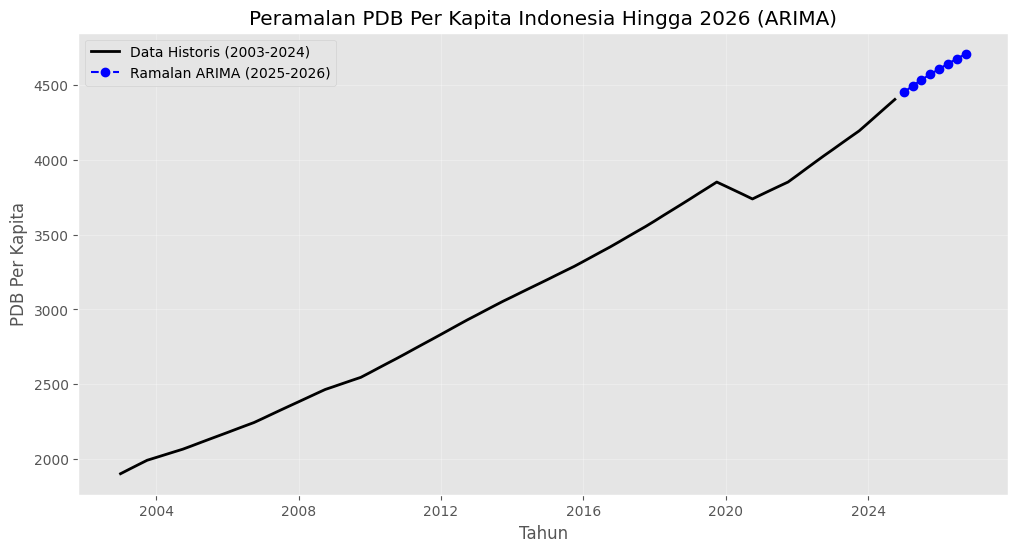

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['y'], label='Data Historis (2003-2024)', color='black', linewidth=2)
plt.plot(df_forecast.index, df_forecast['y_forecast'], label='Ramalan ARIMA (2025-2026)', color='blue', linestyle='--', marker='o')

plt.title('Peramalan PDB Per Kapita Indonesia Hingga 2026 (ARIMA)')
plt.xlabel('Tahun')
plt.ylabel('PDB Per Kapita')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()